# Сomputer Game Sales Analysis

**Description:**
Historical data from open sources on sales of computer games from 2006 to 2016, user and expert ratings, genres and platforms are given.
    
**TASK**: to identify the patterns that determine the success of the game, which will allow you to place a bet on a potentially popular product and plan advertising campaigns.

**Key skills and tools:** data preprocessing, exploratory data analysis, data visualization, descriptive statistics, testing of statistical hypotheses; 
- Pandas, Numpy, 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-exploration-and-preprocessing" data-toc-modified-id="Data-exploration-and-preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data exploration and preprocessing</a></span><ul class="toc-item"><li><span><a href="#data-loading-and-description" data-toc-modified-id="data-loading-and-description-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>data loading and description</a></span></li><li><span><a href="#data-preprocessing" data-toc-modified-id="data-preprocessing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>data preprocessing</a></span></li></ul></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#number-of-games-by-year" data-toc-modified-id="number-of-games-by-year-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>number of games by year</a></span></li><li><span><a href="#sales-by-years-by-platforms" data-toc-modified-id="sales-by-years-by-platforms-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>sales by years by platforms</a></span></li><li><span><a href="#top-selling-platforms" data-toc-modified-id="top-selling-platforms-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>top selling platforms</a></span></li><li><span><a href="#impact-of-reviews-on-sales" data-toc-modified-id="impact-of-reviews-on-sales-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>impact of reviews on sales</a></span></li><li><span><a href="#sales-by-genre" data-toc-modified-id="sales-by-genre-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>sales by genre</a></span></li><li><span><a href="#sales-by-ESRB-rating" data-toc-modified-id="sales-by-ESRB-rating-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>sales by ESRB rating</a></span></li></ul></li><li><span><a href="#User-portrait" data-toc-modified-id="User-portrait-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>User portrait</a></span><ul class="toc-item"><li><span><a href="#genre" data-toc-modified-id="genre-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>genre</a></span></li><li><span><a href="#platform" data-toc-modified-id="platform-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>platform</a></span></li><li><span><a href="#ESRB-rating" data-toc-modified-id="ESRB-rating-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>ESRB rating</a></span></li></ul></li><li><span><a href="#Statistical-hypothesis-testing" data-toc-modified-id="Statistical-hypothesis-testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Statistical hypothesis testing</a></span><ul class="toc-item"><li><span><a href="#hypothesis-1" data-toc-modified-id="hypothesis-1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>hypothesis 1</a></span></li><li><span><a href="#hypothesis-1" data-toc-modified-id="hypothesis-1-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>hypothesis 1</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Data exploration and preprocessing

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats as st

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

### data loading and description

In [2]:
df = pd.read_csv('data/games.csv', sep=',')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**column description**

- `Name` - name of a game
- `Platform` - platform of a game
- `Year_of_Release` - year of release
- `Genre` - genre of a game
- `NA_sales` — sales in North America (mln copies)
- `EU_sales` — sales in Europe (mln copies)
- `JP_sales` — sales in Japan (mln copies)
- `Other_sales` — sales in other countries (mln copies) 
- `Critic_Score` — critics' score (max 100)
- `User_Score` — user' score (max 10)
- `Rating` — Entertainment Software Rating Board (self-regulatory organization that assigns age and content ratings to consumer video games in the United States and Canada)

In [3]:
df.info()
# initial number of lines (for future comparison)
total_entries = df.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# sales data has a high standard deviation compared to the mean, outliers need to be checked
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


In [5]:
# a small number of empty values in the title, year and genre can be removed
# the rating and rating data could be supplemented with an average/median, but this would greatly distort the data
df.isna().mean() * 100

Name               0.01
Platform           0.00
Year_of_Release    1.61
Genre              0.01
NA_sales           0.00
EU_sales           0.00
JP_sales           0.00
Other_sales        0.00
Critic_Score      51.32
User_Score        40.09
Rating            40.48
dtype: float64

In [6]:
# no obvious duplicates
df.duplicated().sum()

0

In [7]:
# but we see duplicates in the names with platforms
df[df.duplicated(subset=['Name', 'Platform'])]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1591,Need for Speed: Most Wanted,X360,2005.00,Racing,1.00,0.13,0.02,0.10,83.00,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.00,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.00,Racing,0.00,0.06,0.00,0.02,82.00,8.5,T
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.00,Sports,0.00,0.01,0.00,0.00,83.00,5.5,E


### data preprocessing

In [8]:
# transform and add data
df.columns = df.columns.str.lower()
df.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)
df.drop_duplicates(subset=['name', 'platform'], inplace=True)

df['year_of_release'] = df['year_of_release'].astype('int')

df['user_score'] = df['user_score'].replace('tbd', np.nan).fillna(-1).astype('float').replace(-1, np.nan)
df['critic_score'] = df['critic_score']/10 
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis='columns')

df.insert(8, 'total_sales', df.pop('total_sales'))

Text(0, 0.5, 'frequency')

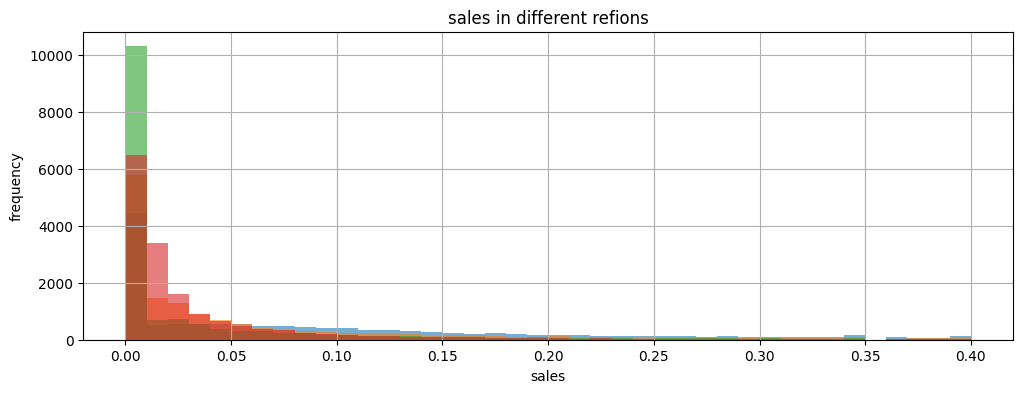

In [9]:
# check outliers in sales data
df.na_sales.hist(bins=40, figsize=(12,4), range=(0,0.4), alpha=0.6)
df.eu_sales.hist(bins=40, figsize=(12,4), range=(0,0.4), alpha=0.6)
df.jp_sales.hist(bins=40, figsize=(12,4), range=(0,0.4), alpha=0.6)
df.other_sales.hist(bins=40, figsize=(12,4), range=(0,0.4), alpha=0.6)

plt.title('sales in different refions')
plt.xlabel('sales')
plt.ylabel('frequency')
# we see that sales are mostly no more than 0.2 million copies

In [10]:
# let's look at the best-selling ones, these are very popular games, this is not a mistake
# so we will not remove such "outliers"
df[(df['total_sales'] > 10)].sort_values(by='total_sales', ascending=False).head(10).name

0                   Wii Sports
1            Super Mario Bros.
2               Mario Kart Wii
3            Wii Sports Resort
4     Pokemon Red/Pokemon Blue
5                       Tetris
6        New Super Mario Bros.
7                     Wii Play
8    New Super Mario Bros. Wii
9                    Duck Hunt
Name: name, dtype: object

In [11]:
# replace the empty values "no rating" in the rating, as most likely the rating simply does not exist for some games
df['rating'] = df['rating'].fillna('no rating')

In [12]:
# we removed less than 2% of the values, this is an acceptable amount
print(round((df.shape[0] / total_entries - 1)*100,2))

-1.64


In [13]:
# check final df
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
1300,Midway Arcade Treasures,PS2,2003,Misc,0.72,0.56,0.00,0.19,1.47,7.60,NaN,T
5410,Spy Hunter,XB,2002,Racing,0.25,0.07,0.00,0.01,0.33,7.10,NaN,T
15440,Demolition Company: Gold Edition,PC,2011,Simulation,0.00,0.02,0.00,0.00,0.02,NaN,NaN,no rating
5060,Paws & Claws: Pampered Pets,DS,2009,Simulation,0.35,0.00,0.00,0.03,0.38,NaN,NaN,no rating
3764,NASCAR 09,PS2,2008,Racing,0.26,0.20,0.00,0.07,0.53,NaN,7.90,E


**CONCLUSION**
    
- data on sales of computer games from 2006 to 2016, user and expert ratings, genres and platforms
- column names are reduced to lowercase, lines with gaps in columns 'name', 'year_of_release', 'genre' are removed, duplicates are removed, less than 2% of values ​​are removed in total
- 'year_of_release' column cast to int, 'user_score' column cast to float ('tbd' changed to nan)
- added column with total sales 'total_sales'
- critic_score and user_score data were not filled with mean/median, as this can greatly distort the data, games may be too different in characteristics. empty values ​​are most likely due to the fact that the data was collected manually or simply did not exist, because the game did not attract attention or the ratings were not collected in those years
- outliers with the number of sales were not deleted, because this is not an error, but the most popular games, we will leave them for analysis

## Exploratory data analysis

### number of games by year

,name
year_of_release,
2008,980
2009,953
2010,857


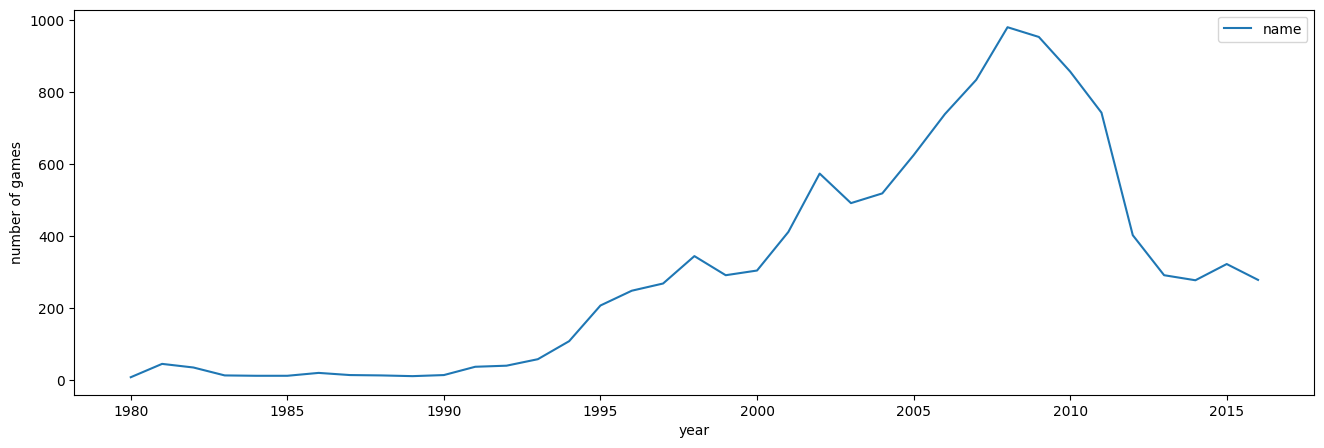

In [14]:
# prepare a table of titles and games and the year of their release
games = df[['name', 'year_of_release', 'rating']].sort_values(by=['name', 'year_of_release'])
games.drop_duplicates(subset=['name'], inplace=True)

# see how many games were released in different years
year_games = pd.pivot_table(games, 
               index='year_of_release', 
               values=['name'], 
               aggfunc='count')

plt.figure(figsize=(16,5))
sns.lineplot(data=year_games).set(xlabel='year', ylabel='number of games')

year_games.sort_values(by='name', ascending=False).head(3)

Thanks to the growing popularity and availability of personal computers and the development of the Internet, sales began to grow sharply in the 90s and peaked in 2008-2010 in the region of 1 billion. copies and then began to decline sharply and fell to 0.3 billion due to the consequences of the global crisis in 2008

### sales by years by platforms

Text(0.5, 1.0, 'sales by platform')

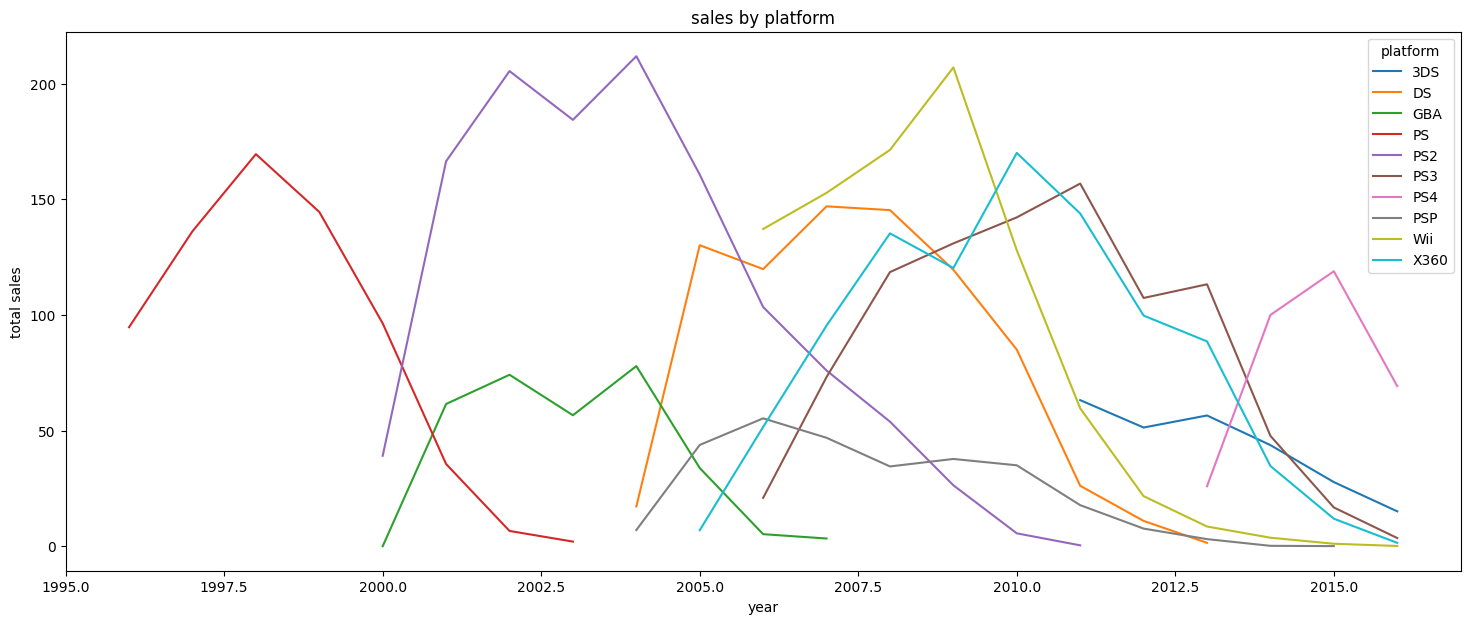

In [15]:
# select the largest platforms
top_platform = list(
                pd.pivot_table(df, index=['platform'], values='total_sales', aggfunc='sum')
                .sort_values(by='total_sales', ascending=False).reset_index().head(10).platform)

# let's see how sales have changed on the largest platforms
year_platform_sales = pd.pivot_table(df.query('platform in @top_platform and year_of_release > 1995'), 
               index=['year_of_release', 'platform'], 
               values='total_sales', 
               aggfunc='sum').reset_index().sort_values(by='platform')

plt.figure(figsize=(18,7))
sns.lineplot(data=year_platform_sales
             , x="year_of_release", y="total_sales", hue="platform").set(xlabel='year', ylabel='total sales')
plt.title('sales by platform')

In [16]:
# what games were released during the years of maximum sales
plat = 'Wii'
year = 2009
df[(df['platform'] == plat) & (df['year_of_release'] == year)].sort_values(by='total_sales', ascending=False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,8.00,8.00,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,28.32,8.70,8.40,E
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,21.80,8.00,7.40,E
103,Just Dance,Wii,2009,Misc,3.48,2.99,0.00,0.73,7.20,4.90,8.00,E10+
237,Mario & Sonic at the Olympic Winter Games,Wii,2009,Sports,1.87,1.96,0.22,0.48,4.53,NaN,NaN,no rating


- the chart shows that different platforms had their "golden time"
- average platform duration is about 10 years

### top selling platforms

In [17]:
# for further analysis, we will take only actual data 
# after 2013 (after the end of the decline in sales after the peak in 2008-2010)
df_actual = df.query('year_of_release >= 2013').reset_index(drop=True)
df_actual.shape

(2233, 12)

Text(0.5, 1.0, 'sales by platform 2013-2015')

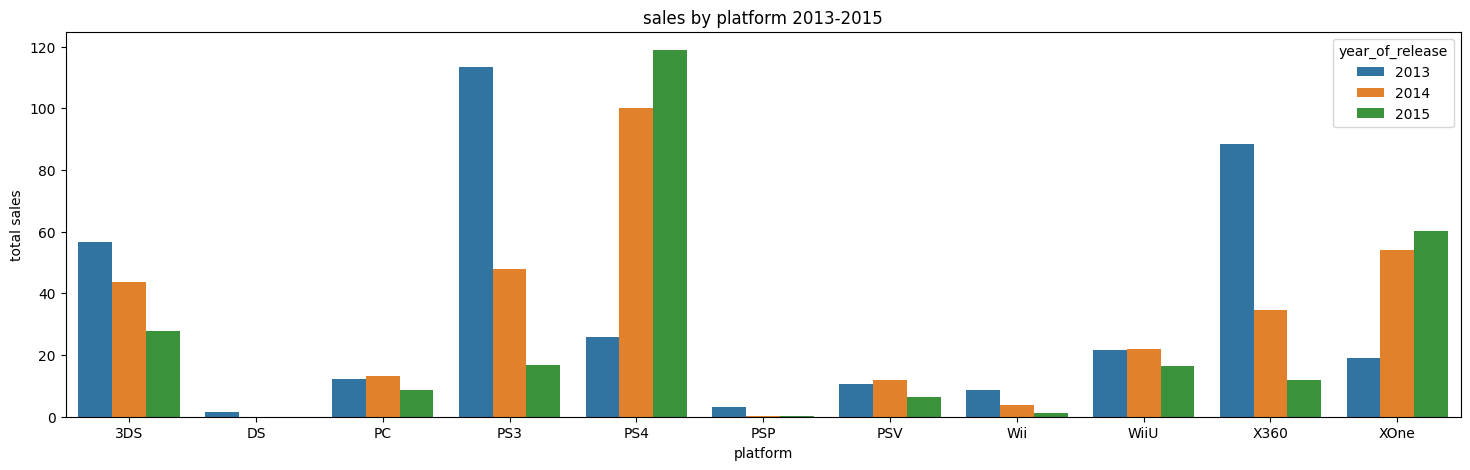

In [18]:
# let's see the platforms are leading in sales, growing or falling after 2013 (without 2016, as there is little data)
year_platform_sales = pd.pivot_table(df_actual[df_actual['year_of_release'] != 2016], 
               index=['platform', 'year_of_release'], 
               values='total_sales', 
               aggfunc='sum').reset_index().sort_values(by='platform')

plt.figure(figsize=(18,5))
sns.barplot(data=year_platform_sales
            , x="platform", y="total_sales", hue="year_of_release").set(xlabel='platform', ylabel='total sales')
plt.title('sales by platform 2013-2015')

the number of sales is growing only on the PS4 and XOne platforms, on the rest it is declining

Text(0.5, 1.0, 'sales by platform 2013-2015')

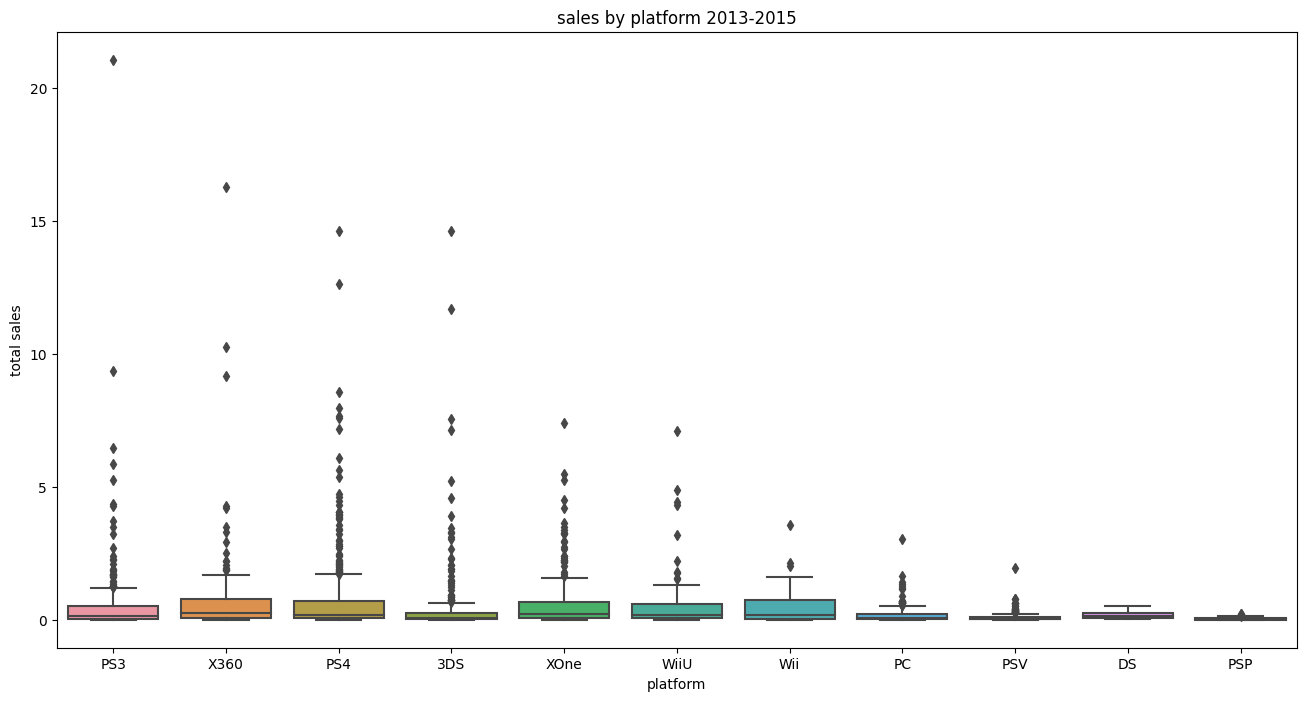

In [19]:
# look at the boxplot
plt.figure(figsize=(16,8))
sns.boxplot(data=df_actual
            , x="platform", y="total_sales").set(xlabel='platform', ylabel='total sales')
plt.title('sales by platform 2013-2015')

we can see from the graph that almost every platform has its own popular games that make very high sales

Text(0.5, 1.0, 'sales by platform 2013-2015')

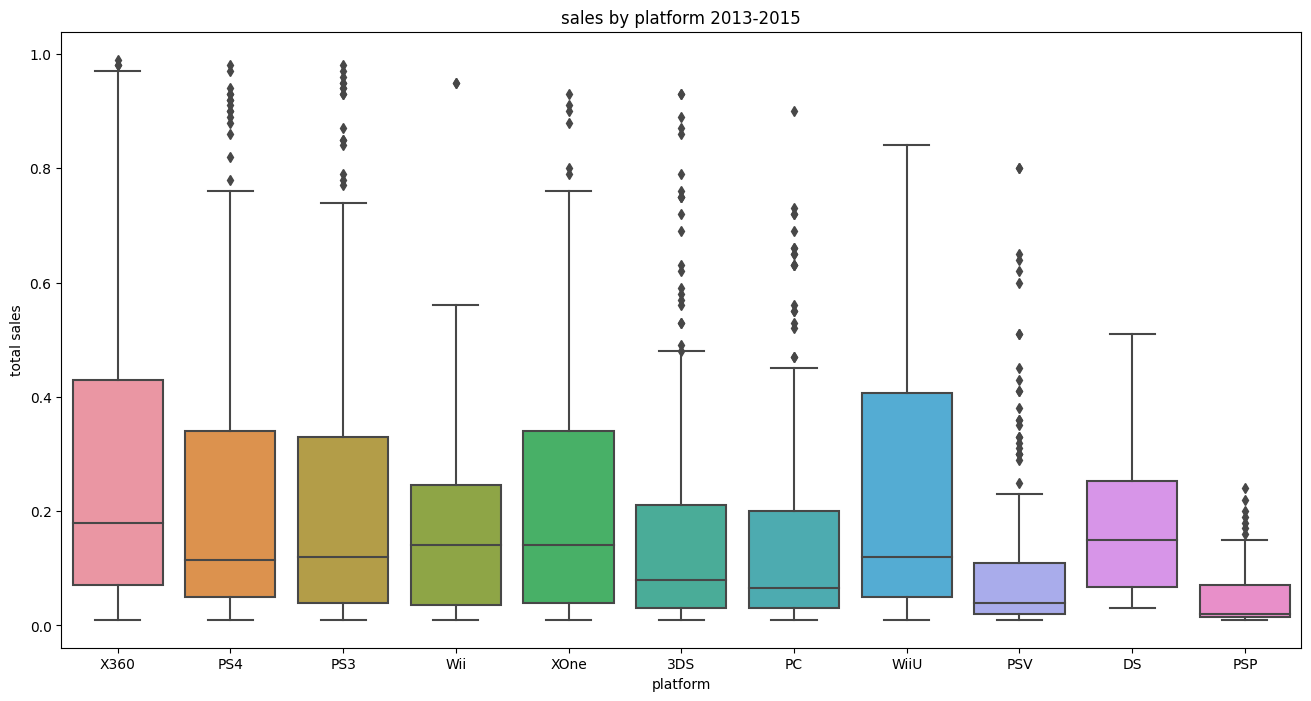

In [20]:
# remove very popular games and look at the boxplot once again 
plt.figure(figsize=(16,8))
sns.boxplot(data=df_actual[df_actual['total_sales'] < 1]
            , x="platform", y="total_sales").set(xlabel='platform', ylabel='total sales')
plt.title('sales by platform 2013-2015')

we can see from the graph that the top quartile does not exceed global sales of 0.5 million copies, the median lies in the region of 0.1-0.2 million copies

### impact of reviews on sales

In [21]:
# choose popular and promising platforms that have been growing in recent years: PS4 and XOne
df_PS4 = df_actual[df_actual['platform'] == 'PS4']
df_XOne = df_actual[df_actual['platform'] == 'XOne']

In [22]:
# let's see what correlations there are with overall sales on the PS4 platform
df_PS4.corr().total_sales.sort_values(ascending=False)

total_sales        1.00
other_sales        1.00
eu_sales           0.96
na_sales           0.93
jp_sales           0.53
critic_score       0.41
user_score        -0.03
year_of_release   -0.24
Name: total_sales, dtype: float64

In [23]:
# let's see what correlations there are with overall sales on the XOne platform
df_XOne.corr().total_sales.sort_values(ascending=False)

total_sales        1.00
other_sales        1.00
na_sales           0.97
eu_sales           0.90
jp_sales           0.45
critic_score       0.42
user_score        -0.07
year_of_release   -0.24
Name: total_sales, dtype: float64

- on both platforms, the correlation between total sales and critic reviews is weak - 40% (removing popular games from df or vice versa analyzing only them does not help to find a stronger correlation)
- it is interesting that the user rating does not have a correction with sales at all

### sales by genre

,genre,total_sales,% sales
8,Shooter,1.25,22.35
10,Sports,0.70,12.63
4,Platform,0.58,10.33
7,Role-Playing,0.50,8.96
6,Racing,0.47,8.42
2,Fighting,0.44,7.92
0,Action,0.42,7.54
3,Misc,0.41,7.27
9,Simulation,0.35,6.29
5,Puzzle,0.19,3.34


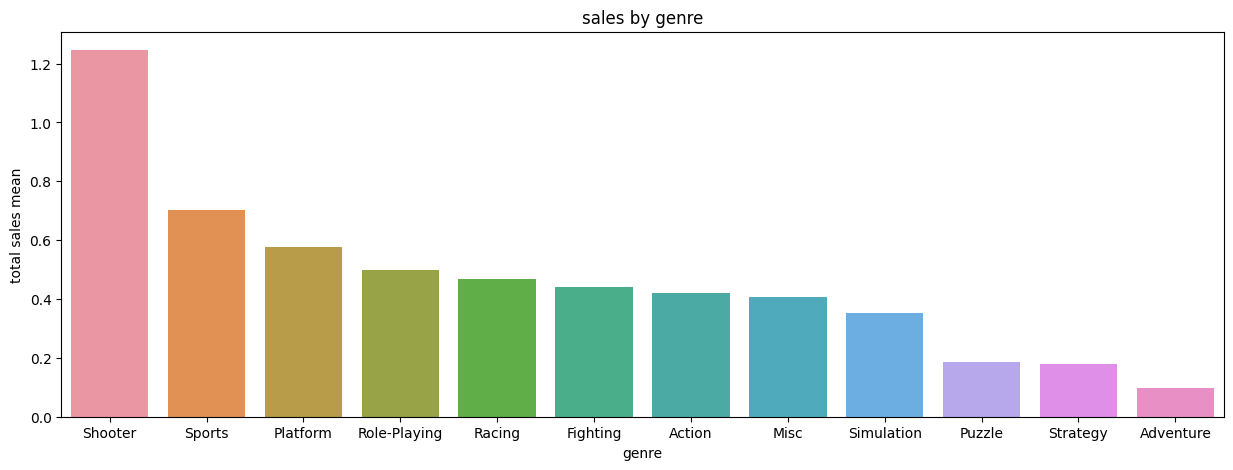

In [24]:
# look at sales by genre
genre_sales = pd.pivot_table(df_actual, 
               index='genre', 
               values='total_sales', 
               aggfunc='mean').reset_index().sort_values(by='total_sales', ascending=False)

genre_sales['% sales'] = genre_sales['total_sales']/genre_sales['total_sales'].sum()*100

plt.figure(figsize=(15,5))
sns.barplot(data=genre_sales, x="genre", y="total_sales").set(xlabel='genre', ylabel='total sales mean')
plt.title('sales by genre')

genre_sales

- after 2013, on average, the most popular genres are Shooter and occupy 22% of the market
- Puzzle, Strategy, Adventure genres are the least popular and together occupy 8% of the market

### sales by ESRB rating

,rating,total_sales,% sales
2,M,371.68,34.08
4,no rating,276.84,25.38
0,E,200.16,18.35
3,T,126.62,11.61
1,E10+,115.39,10.58


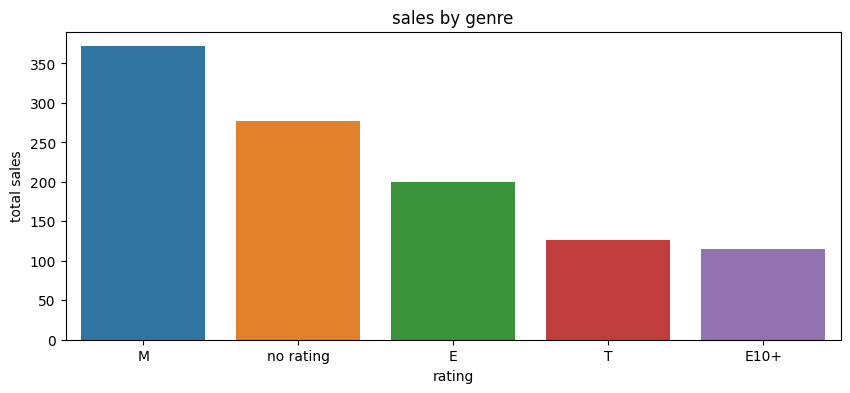

In [25]:
# consider how many sales with what ratings
genre_sales = pd.pivot_table(df_actual, 
               index='rating', 
               values='total_sales', 
               aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)

genre_sales['% sales'] = genre_sales['total_sales']/genre_sales['total_sales'].sum()*100

plt.figure(figsize=(10,4))
sns.barplot(data=genre_sales, x="rating", y="total_sales").set(xlabel='rating', ylabel='total sales')
plt.title('sales by genre')

genre_sales

- 34% of M-rated games sold
- 25% (which is a lot) of sales without a rating, we will consider in more detail further

,rating,name,%
7,no rating,5569,48.74
0,E,2489,21.78
6,T,1812,15.86
4,M,846,7.40
1,E10+,701,6.14
2,EC,5,0.04
3,K-A,3,0.03
5,RP,1,0.01


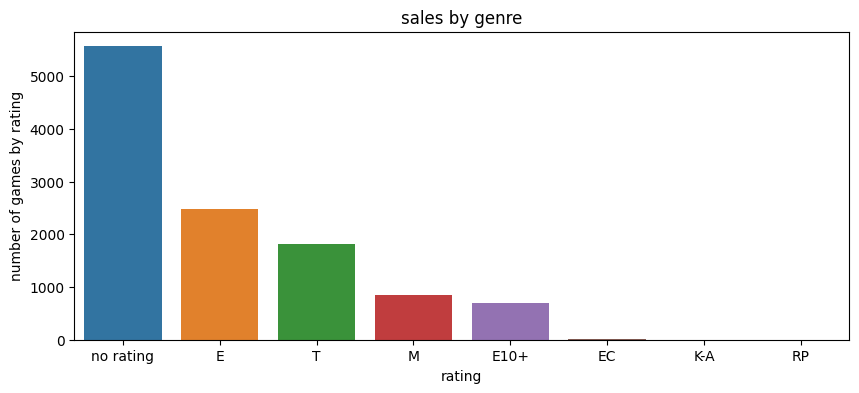

In [26]:
# consider how many games with what rating are generally released
genre_sales = pd.pivot_table(games, 
               index='rating', 
               values='name', 
               aggfunc='count').reset_index().sort_values(by='name', ascending=False)

genre_sales['%'] = genre_sales['name']/genre_sales['name'].sum()*100

plt.figure(figsize=(10,4))
sns.barplot(data=genre_sales, x="rating", y="name").set(xlabel='rating', ylabel='number of games by rating')
plt.title('sales by genre')

genre_sales

- 49% of all released games are not rated by the ESRB. this rating is created for games in the USA and Canada, so the rest of the games are from other regions and there is no data for them

**CONCLUSION**

- due to the growing popularity and availability of personal computers and the development of the Internet, in the 90s, a sharp increase in sales began and reached a peak in 2008-2010 in the region of 1 billion. copies and then began to decline sharply due to the consequences of the global crisis in 2008


- different platforms at different times had their popularity, for example PS in 1998, PS2 in 2002 and 2004, Wii in 2009, PS3 in 2014
- the average duration of the popularity of the platform is about 10 years
- after 2013, the number of sales grows only on the PS4 and XOne platforms, on the rest it decreases


- each platform has its own popular games that make very high sales (over 1 million copies)
- but for less popular games, the top quartile of global sales does not exceed 0.5 million copies, the median lies in the region of 0.1-0.2 million copies


- on PS4 and XOne platforms, which are growing after 2013, the correlation between total sales and critical reviews is weak - 40%
- it is interesting that the user rating, unlike the ratings of critics, does not have a correction with sales at all



- after 2013, on average, the most popular genres are Shooter and occupy 22% of the market
- Puzzle, Strategy, Adventure genres are the least popular and together occupy 8% of the market


- 34% of M-rated games sold
- 49% of released games without ESRB rating (the rating is created for games in the US and Canada, so the rest of the games are from other regions)

## User portrait

### genre

,eu_sales,jp_sales,na_sales
genre,,,
Shooter,22.79,4.82,26.68
Sports,13.72,3.45,13.87
Platform,10.21,8.83,11.14
Fighting,5.18,13.05,8.84
Misc,6.27,8.10,8.06
Action,7.48,7.21,7.48
Role-Playing,6.14,23.86,7.22


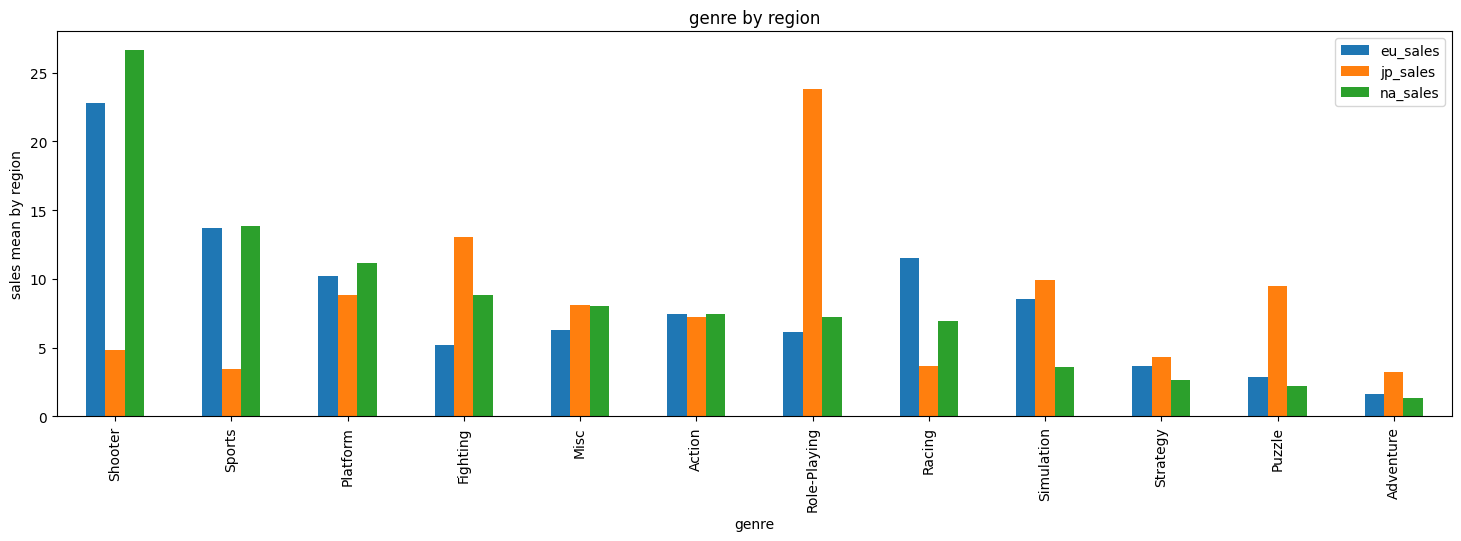

In [27]:
# see how popular genres differ by region
genre_region = pd.pivot_table(df_actual, 
               index='genre', 
               values=['na_sales', 'eu_sales','jp_sales'], 
               aggfunc='mean').sort_values(by='na_sales', ascending=False)

# we will make a percentage to level the difference in the number of sales
genre_region['na_sales'] = genre_region['na_sales']/genre_region['na_sales'].sum()*100
genre_region['eu_sales'] = genre_region['eu_sales']/genre_region['eu_sales'].sum()*100
genre_region['jp_sales'] = genre_region['jp_sales']/genre_region['jp_sales'].sum()*100

genre_region.plot(kind='bar', figsize=(18,5))
plt.title('genre by region')
plt.xlabel('genre')
plt.ylabel('sales mean by region')

genre_region.head(7)

- in terms of genres, users in the NA and EU regions have similar interests - on average, the most popular are Shooter (~22-27%), Sports (~13%)
- users of the JP region on average like Role-Playing the most (24%), and vice versa dislike Shooter (5%) and Sports (4%) + like Puzzle (9%) more than in other regions

### platform

,eu_sales,jp_sales,na_sales
platform,,,
PS4,35.97,11.34,24.84
XOne,13.15,0.24,21.27
X360,10.84,0.36,18.66
PS3,17.29,16.59,14.51
3DS,7.89,48.17,8.73


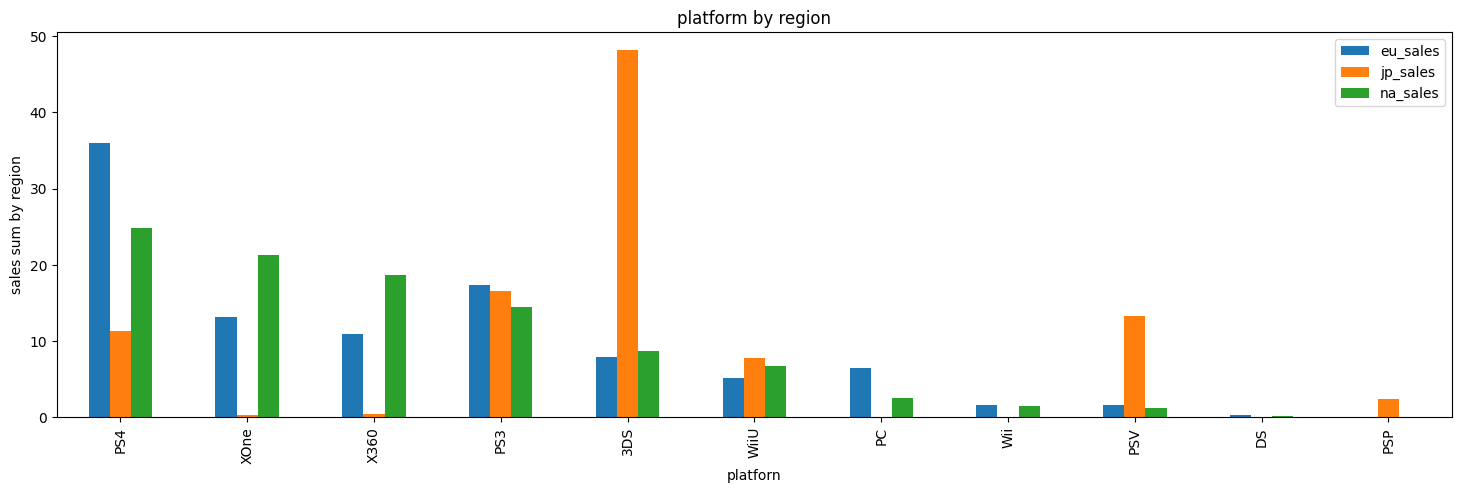

In [28]:
# see how platforms differ by region
platform_region = pd.pivot_table(df_actual, 
               index='platform', 
               values=['na_sales', 'eu_sales','jp_sales'], 
               aggfunc='sum').sort_values(by='na_sales', ascending=False)

# we will make a percentage to level the difference in the number of sales
platform_region['na_sales'] = platform_region['na_sales']/platform_region['na_sales'].sum()*100
platform_region['eu_sales'] = platform_region['eu_sales']/platform_region['eu_sales'].sum()*100
platform_region['jp_sales'] = platform_region['jp_sales']/platform_region['jp_sales'].sum()*100

platform_region.plot(kind='bar', figsize=(18,5))
plt.title('platform by region')
plt.xlabel('platforn')
plt.ylabel('sales sum by region')

platform_region.head()

- PS4, XOne, X360 and PS3 platforms are the most popular in NA and EU regions
- 48% of JP users choose 3DS platform and almost never use XOne and X360

Nintendo, which produces the 3DS, is a Japanese company, which is why the 3DS platform is so popular in the JP region

### ESRB rating

,eu_sales,jp_sales,na_sales
rating,,,
no rating,20.12,60.41,20.43
T,10.70,14.63,11.38
M,37.05,10.02,37.74
E10+,10.88,4.18,12.39
E,21.25,10.75,18.06


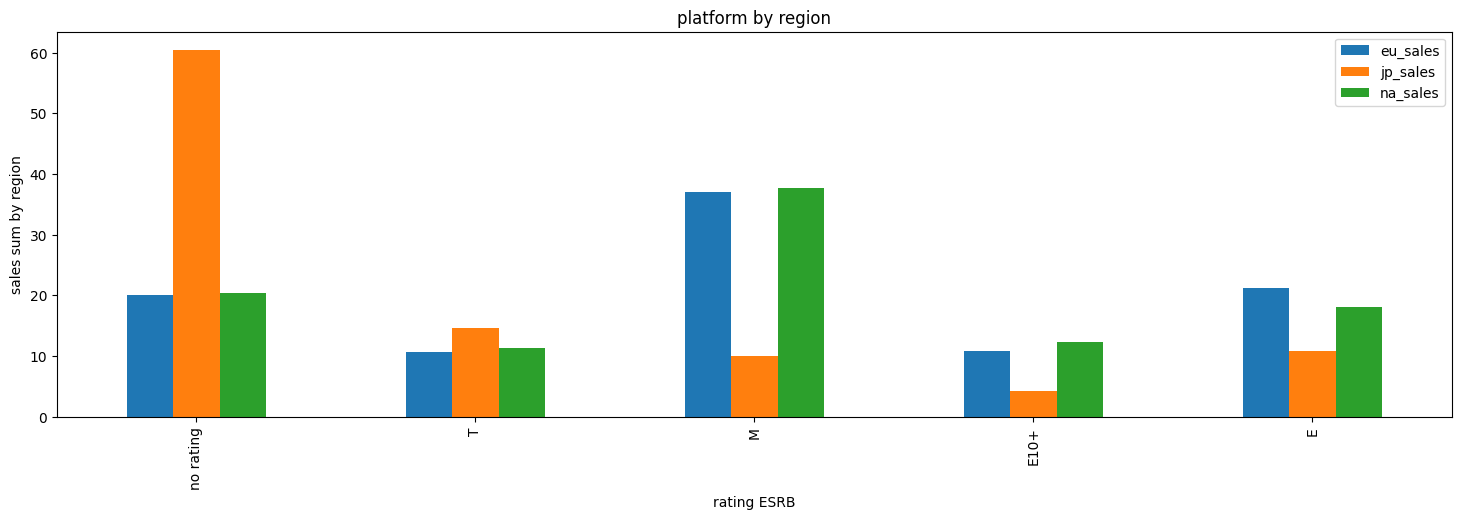

In [29]:
# see how the ratings differ by region
rating_region = pd.pivot_table(df_actual, 
               index='rating', 
               values=['na_sales', 'eu_sales','jp_sales'], 
               aggfunc='sum').sort_values(by='rating', ascending=False)

# we will make a percentage to level the difference in the number of sales
rating_region['na_sales'] = rating_region['na_sales']/rating_region['na_sales'].sum()*100
rating_region['eu_sales'] = rating_region['eu_sales']/rating_region['eu_sales'].sum()*100
rating_region['jp_sales'] = rating_region['jp_sales']/rating_region['jp_sales'].sum()*100

rating_region.plot(kind='bar', figsize=(18,5))
plt.title('platform by region')
plt.xlabel('rating ESRB')
plt.ylabel('sales sum by region')

rating_region

- in NA and EU regions, most users choose M rating
- in the JP region, most users play games without an ESRB rating (this rating is for the game in the US and Canada, so it's normal that there is no data in Japan)

we can conclude that the rating (or lack of it) can affect sales in the region - for Japan it is not important, for NA and EU M is more popular

**CONCLUSION**

*genre*
- in terms of genres, users in the NA and EU regions have similar interests - on average, the most popular are Shooter (~22-27%), Sports (~13%)
- users of the JP region on average like Role-Playing the most (24%), and vice versa dislike Shooter (5%) and Sports (4%) + like Puzzle (9%) more than in other regions

*platform*
- PS4, XOne, X360 and PS3 platforms are the most popular in NA and EU regions
- 48% of JP users choose the 3DS platform (because Nintendo, which produces the 3DS, is a Japanese company) and almost never use the XOne and X360

*rating*
- in NA and EU regions, most users choose M rating
- in the JP region, most users play games without an ESRB rating (this rating is for the game in the US and Canada, so it's normal that there is no data in Japan)
- we can conclude that the rating (or lack of it) can affect sales in the region - for Japan it is not important, for NA and EU M is more popular

## Statistical hypothesis testing

- we use ttest_ind to test hypotheses, since we need to test independent samples from two different datasets
- we assume that the samples are similar in terms of parameters and variance, so we make the parameter equal_var = True
- set alpha to 5%
- make a decision to accept or reject the null hypothesis by p-value

### hypothesis 1

Let's formulate hypotheses:
- null hypothesis H0: The average user ratings of the XboxOne and PC platforms are the same
- alternative hypothesis H1: The average user ratings of the XboxOne and PC platforms are NOT the same

if H0 is rejected, examine one-sided hypotheses

In [30]:
XOne_score = df_actual[df_actual['platform'] == 'XOne'].user_score.reset_index(drop=True).dropna()
PC_score = df_actual[df_actual['platform'] == 'PC'].user_score.reset_index(drop=True).dropna()

alpha = .05

# test the hypothesis that the means of two independent datasets are equal
results = st.ttest_ind(XOne_score, PC_score, equal_var = True)

print('p-value:', results.pvalue)
print('mean-value user rating XOne:', round(XOne_score.mean(),2))
print('mean-value user rating PC:', round(PC_score.mean(),2))
print()

if results.pvalue < alpha:
    print("Rejecting the Null Hypothesis: The Average User Ratings of the Xbox One and PC Platforms Are Significantly Different")
else:
    print("Failed to reject null hypothesis: Average user ratings of XboxOne and PC platforms are NOT significantly different")

p-value: 0.14012658403611647
mean-value user rating XOne: 6.52
mean-value user rating PC: 6.27

Failed to reject null hypothesis: Average user ratings of XboxOne and PC platforms are NOT significantly different


**conclusion**

It was not possible to reject the null hypothesis: The average user ratings of the XboxOne and PC platforms are NOT significantly different, we will not consider a one-sided hypothesis

### hypothesis 1

formulate hypotheses:
- null hypothesis H0: The average user ratings of the Action and Sports genres are the same
- alternative hypothesis H1: The average user ratings of the Action and Sports genres are NOT the same

if H0 is rejected, examine one-sided hypotheses

In [31]:
action = df_actual[df_actual['genre'] == 'Action'].user_score.reset_index(drop=True).dropna()
sports = df_actual[df_actual['genre'] == 'Sports'].user_score.reset_index(drop=True).dropna()

alpha = .05

# test the hypothesis that the means of two independent datasets are equal
results = st.ttest_ind(action, sports, equal_var = True)

print('p-value:', results.pvalue)
print('mean-value genre Action:', round(action.mean(),2))
print('mean-value genre Sports:', round(sports.mean(),2))
print()

if results.pvalue < alpha:
    print("Rejecting the Null Hypothesis: Average User Ratings for Action and Sports Are Significantly Different")
else:
    print("We failed to reject the null hypothesis: The average user ratings of the Action and Sports genres are the same and do NOT differ significantly")

p-value: 1.0517832389140023e-27
mean-value genre Action: 6.84
mean-value genre Sports: 5.24

Rejecting the Null Hypothesis: Average User Ratings for Action and Sports Are Significantly Different


**conclusion**

It was not possible to reject the null hypothesis: The average user ratings of the Action and Sports genres are the same and do NOT significantly differ, we will not consider the two-tailed hypothesis

## Conclusion

**Research objective**: to identify patterns that determine the success of the game, which will allow you to place a bet on a potentially popular product and plan advertising campaigns.

**data:**
    
- data on sales of computer games from 2006 to 2016, user and expert ratings, genres and platforms
- Column names are reduced to lower case, columns are converted to appropriate type, less than 2% of values ​​are removed
- critic_score and user_score data were not filled with mean/median, because this can greatly distort the data, games can be too different in characteristics, based only on the year, platform and genre incorrectly. empty values ​​are most likely due to the fact that the data was collected manually or simply did not exist, because the game did not attract attention or the ratings were not collected in those years
- outliers with the number of sales were not deleted, because this is not an error, but the most popular games, left them for analysis

**exploratory data analysis:**

- due to the growing popularity and availability of personal computers and the development of the Internet, in the 90s, a sharp increase in sales began and reached a peak in 2008-2010 in the region of 1 billion. copies and then began to decline sharply and fell to 0.3 billion due to the consequences of the global crisis in 2008

- different platforms at different times had their popularity, for example PS in 1998, PS2 in 2002 and 2004, Wii in 2009, PS3 in 2014
- the average duration of the popularity of the platform is about 10 years
- after 2013, the number of sales grows only on the PS4 and XOne platforms, on the rest it decreases


- each platform has its own popular games that make very high sales (over 1 million copies)
- but for less popular games, the top quartile of global sales does not exceed 0.5 million copies, the median lies in the region of 0.1-0.2 million copies


- on PS4 and XOne platforms that are growing after 2013, *correlation between total sales and critical reviews is weak* - 40%
- it is interesting that the user rating, unlike the ratings of critics, does not have a correction with sales at all


- after 2013, on average, the most popular genres are Shooter and occupy 22% of the market
- Puzzle, Strategy, Adventure genres are the least popular and together occupy 8% of the market

- 34% of M-rated games sold
- 49% of all released games without an ESRB rating (the rating is created for games in the US and Canada, so the rest of the games are from other regions)

**user portrait:**

*genre*
- in terms of genres, users in the NA and EU regions have similar interests - on average, the most popular are Shooter (~22-27%), Sports (~13%)
- users of the JP region on average like Role-Playing the most (24%), and vice versa dislike Shooter (5%) and Sports (4%) + like Puzzle (9%) more than in other regions

*platform*
- PS4, XOne, X360 and PS3 platforms are the most popular in NA and EU regions
- 48% of JP users choose the 3DS platform (because Nintendo, which produces the 3DS, is a Japanese company) and almost never use the XOne and X360

*ESRB rating*
- in NA and EU regions, most users choose M rating
- in the JP region, most users play games without an ESRB rating (this rating is for games in the US and Canada, so it's normal that there is no data in Japan)
- we can conclude that the rating (or lack of it) can affect sales in the region - for Japan it is not important, for NA and EU M is more popular

**tested hypotheses**

- used functions: ttest_ind (equal_var = True) for two-tailed hypothesis, ttest_1samp for one-tailed hypothesis
- alpha = 5%
- make a decision to accept or reject the null hypothesis by p-value

*Hypothesis 1: The average user ratings of the Xbox One and PC platforms are the same*
- one-sided hypothesis: Failed to reject the null hypothesis: The average user ratings of the Xbox One and PC platforms are NOT significantly different

*Hypothesis 2: Average user ratings for Action and Sports are the same*
- one-sided hypothesis: We failed to reject the null hypothesis: *Average user ratings of the Action and Sports genres are the same, NOT significantly different*

**WHAT DEFINES A SUCCESSFUL GAME?**

1. Genre (Most Popular Genre - Shooter)
2. platform (after 2013, the popularity of PS4 and XOne is growing)
3. ESRB rating (34% of M-rated games sold)
4. region (for example, in the JP region, half of the users choose the 3DS platform, they prefer the Role-Playing genre and play games without ESRB rating)